- 참고 서적 : 머신러닝 완벽가이드 9장
- 참고 링크 : https://john-analyst.medium.com/%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-recommendation-system-%EC%9D%B4%EB%9E%80-111e315f8256

# 1. 컨텐츠 기반 필터링 추천시스템 - 개념

- 콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식이다. 예를 들어 사용자가 특정 영화에 높은 평점을 줬따면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해주는 방식입니다.
- 영화추천에 있어서는, 사용자가 선호하는 감독, 장르, 키워드 등의 콘텐츠를 다양하게 포함하고 있으므로 효율적


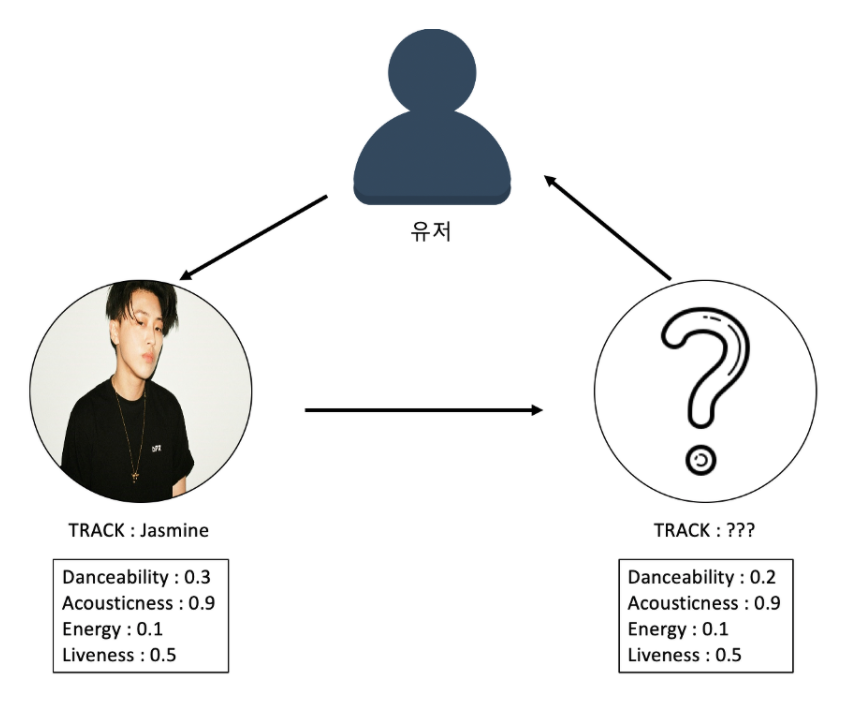
__쉽게말해, 사용자가 특정 곡을 좋아하는 경우, 이와 비슷한 콘텐츠를 가진 다른 곡을 추천하는 방식이다.__

---
# 2. 컨텐츠 기반 필터링 추천시스템 - 실습
- 머신러닝 완벽가이드 책 9장 추천시스템 579 P ~ 
- TMDB 5000 영화 데이터 활용 (https://www.kaggle.com/tmdb/tmdb-movie-metadata)
    - tmdb_5000_credits.csv
    - tmdb_5000_movies.csv

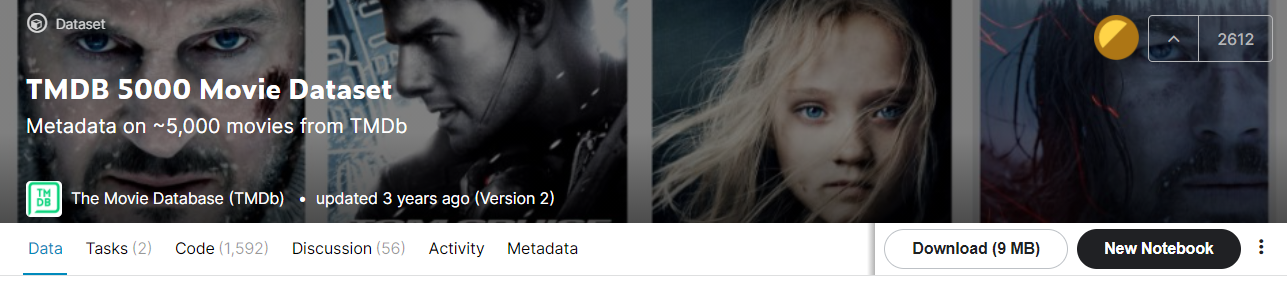

- __장르 속성을 이용한 영화 컨텐츠 기반 필터링 <br><br>__
&nbsp;__컨텐츠 기반 필터링__은 사용자가 특정 영화를 감상하고 그 영화를 좋아했다면, 그 영화와 비슷한 특성/속성, 구성 요소 등을 가진 다른 영화를 추천하는 것입니다. 가령 영화 '인셉션'을 재밌게 봤따면 '인셉션'의 장르인 액션, 공상과학으로 높은 평점을 받은 다른 영화를 추천하거나 '인셉션'의 감독인 크리스토퍼놀란의 다른 영화를 추천하는 방식입니다. <br><br>&nbsp;__이렇게 영화(또는 상품/서비스)간의 유사성을 판단하는 기준이 영화를 구성하는 다양한 콘텐츠(장르, 감독, 배우, 평점, 키워드, 영화 설명)을 기반으로 하는 방식이 바로 <u>컨텐츠 기반 필터링</u>입니다.__
---

__<font color = 'red'>STEP 01 : 데이터 로딩 및 가공</font>__

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies = pd.read_csv('../data/tmdb/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(2)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


__tmdb_5000_movies.csv__ 는 4803개의 레코드와 20개의 피처로 구성되어 있다. <u>영화제목, 개요, 인기도, 평점, 투표 수, 예산, 키워드 </u> 등 영화에 대한 다양한 메타정보를 가지고 있다. 이 중 컨텐츠 기반 필터링 추천 분석에 사용한 주요 칼럼만 추출해 새롭게 DataFrame으로 만들겠습니다.<br><br>&nbsp; 추출할 주요 칼럼은 __id__, 영화제목 __title__, 영화가 속한 여러 가지 장르인 __genres__, 평균 평점인 __vote_average__, 평점 투표 수인 __vote_count__, 영화의 인기를 나타내는 __popularity__, 영화를 설명하는 주요 키워드 문구인 __keywords__ , 영화에 대한 개요 설명인 __overview__ 입니다. 

In [2]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count', 'popularity',
                   'keywords', 'overview']]
movies_df.tail(3)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
4800,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",7.0,6,1.444476,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,Shanghai Calling,[],5.7,7,0.857008,[],When ambitious New York attorney Sam is sent t...
4802,25975,My Date with Drew,"[{""id"": 99, ""name"": ""Documentary""}]",6.3,16,1.929883,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",Ever since the second grade when he first saw ...


tmdb_5000_movies.csv 파일을 DataFrame으로 처리할 때 주의할 칼럼이 존재한다.<br> __'genres', 'keywords'__ 같은 칼럼을 보면 <u>[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}] </u> 와 같이 파이썬 list 내부에 여러 개의 dict가 있는 형태의 문자열로 표기되어 있다. 이는 한꺼번에 여러 개의 값을 표현하기 위한 표기 방식이다.  <br>
&nbsp; 예를 들어 영화 '아바타'의 'genres는 'Action'과 'Adventure' 등의 여러 가지 장르로 구성될 수 있기 때문입니다. 

In [3]:
from ast import literal_eval

# string => dict
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)


# extract genres and keyword by dictionary
movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])

movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."


---

__<font color = 'red'> STEP 02 : 장르 콘텐츠 유사도 측정</font>__

genres 칼럼은 여러 개의 장르가 리스트로 구성돼 있습니다. 만약 영화 A의 genres가 [Action, Adventure, Fantasy, Science Fiction]으로 돼 있고, 영화 B의 genres가 [Adventure, Fantasy, Action]으로 돼 있다면 __어떻게 장르별 유사도를 측정할까요?__ <br>&nbsp;
여러 가지 방법이 있겠지만, 가장 간단한 방법은 genres를 문자열로 변경한 뒤 이를 CounterVectorizer로 피처 벡터화 한 행렬 데이터 값을 코사인 유사도로 비교하는 것입니다. <br><br>&nbsp;
__genres 칼럼을 기반으로 하는 콘텐츠 기반 필터링은 다음과 같은 단계로 구현하겠습니다.__
- 문자열로 변환된 genres 칼럼을 Count 기반으로 피처 벡터화 변환합니다.
- genres 문자열을 피처 벡터화 행렬로 데이터 세트를 코사인 유사도를 통해 비교합니다. 이를 위해 데이터 세트의 레코드별로 타 레코드와 장르에서 코사인 유사도 값을 가지는 객체를 생성합니다. 
- 장르 유사도가 높은 영화 중에 평점이 높은 순으로 영화를 추천합니다. 

먼저, genres 칼럼을 문자열로 변환한 뒤 사이킷런의 CountVectorizer를 이용해 피처 벡터 행렬로 만들겠습니다.<br> 리스트 객체 값으로 구성된 genres 칼럼을 __apply(lambda x : (' ').join(x))__을 적용해 개별 요소를 공백 문자로 구분하는 문자열로 변환해 별도의 칼럼인 genres_listeral 칼럼으로 저장합니다. <br><br>&nbsp;__리스트 객채 내의 개별 값을 연속된 문자열로 변환하려면 일반적으로 ('구분문자').join(리스트 객체)를 사용하면 됩니다.__

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환.
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df = 0, ngram_range = (1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])

display(movies_df[['genres_literal']].head(5))

print('genre_mat shape : ', genre_mat.shape)

,genres_literal
0,Action Adventure Fantasy Science Fiction
1,Adventure Fantasy Action
2,Action Adventure Crime
3,Action Crime Drama Thriller
4,Action Adventure Science Fiction


genre_mat shape :  (4803, 276)


CountVectorizer로 변환해 4803개의 레코드와 276개의 개별 단어 피처로 구성된 피처 벡터 행렬이 만들어 졌습니다.<br>
__이렇게 생성된 피처 벡터 행렬에 사이킷런의 cosine_similarity()를 이용해 <u>코사인 유사도</u>를 계산__

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:1])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]]


- 코사인 유사도를 활용하여 앞서 생성한 __genre_sim__ 객체를 이용하여 moovies_df의 개별 레코드에 대한 장르 유사도를 파악할 수 있다.
- __genre_sim__ 객체의 기준 행별로 비교 대상이 되는 행의 유사도 값이 높은 순으로 정렬된 행렬의 위치 인덱스 값을 추출하면 되다.

__<u>argsort()[:, ::-1]</u>를 이용하면 유사도가 높은 순으로 정리되어 genre_sim 객체의 비교 행 위치 인덱스값을 편하게 얻을 수 있다.__

In [9]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


> 위의 __[[   0 3494  813 ... 3038 3037 2401]]__ 이 의미하는 것은, __0__번 데이터는 자신인 0은 유사도가 1이므로 가장 높으며, 그다음인 __3494__의 인덱스를 가지는 데이터가 유사도가 높고, __2401__과의 유사도가 가장 낮다고 해석할 수 있다.

__<font color = 'red'>STEP03 : 장르 콘텐츠 필터링을 이용한 영화 추천</font>__ <br>

__find_sim_movie()__ : 레코드별 장르 코사인 유사도 인덱스를 가지고 있는 __genre_sim_sorted_ind__, 고객이 선정한 추천 기준이 되는 __영화 제목__, __추천할 영화 건수__를 입력하면 추천 영화 정보를 가지는 DataFrame을 반환

In [16]:
def find_sim_movie(df, sorted_ind, title_name, top_n = 10):
    #인자로 입력된 movies_df DataFrame에서 "title" 칼럼이 입력된 title_name 값인 DataFrame 추출
    title_movie = df[df['title'] == title_name]
    
    # title_named를 가진 DataFrame의 index 객체를 ndarray로 반환하고
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index 출력, top_n index는 2차원 데이터임
    # dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

__find_sim_movie() 함수를 이용해 영화 '대부'와 장르별로 유사한 영화 10개를 추천해보겠습니다.__<br>

In [17]:
genre_sim_sorted_ind

array([[   0, 3494,  813, ..., 3038, 3037, 2401],
       [ 262,    1,  129, ..., 3069, 3067, 2401],
       [   2, 1740, 1542, ..., 3000, 2999, 2401],
       ...,
       [4800, 3809, 1895, ..., 2229, 2230,    0],
       [4802, 1594, 1596, ..., 3204, 3205,    0],
       [4802, 4710, 4521, ..., 3140, 3141,    0]], dtype=int64)

In [18]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


__'대부 2편(The Godfather: Part II)'가 가장 먼저 추천됐다. 그 외에 대부분 비슷한 영화가 추천됐지만, 인지도가 매우 낮은 영화들이 많다. vote_average가 0인 'Mi America'라는 영화가 존재하는데, 이런 평점이 낮은 영화를 섣불리 고객에게 추천하기엔 어려우므로 ,개선이 필요하다.__

---

__<font color = 'red'>STEP 04 : 좀더 많은 후보군을 선정한 뒤 영화 평점에 따라 필터링해서 최종 추천하는 방식</font>__<br><br>&nbsp;
영화의 평점 정보인 __vote_average__값을 사용하는데, 이 점수는 1명이나 2명 등 소수의 관객이 특정 영화에 만점이나 매우 높은 평점을 부여해 왜곡된 데이터를 가지고 있습니다.<br><br> 
__이를 확인하기 위해 sort_values()를 이용해 평점('vote_average') 오름차순으로 movies_df를 정렬해서 10개만 출력해 보겠습니다.__

In [19]:
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending = False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


__'쇼생크 탈출(The Shawshank Redemption)'이나 '대부(The Godfather)' 같은 명작보다 높은 순위에 인지도가 전혀 없는 영화가 출력되는 경우가 많다.__<br>
__이들은 모두 평가 횟수가 매우 작아, 평점 데이터가 왜곡 되어 있기 때문이다.__<br><br>&nbsp;
__<u>이러한 이유로, 평점에 평가 횟수를 반영할 수 있는 새로운 평가 방식이 필요하다.</u>__

아래 식은 유명한 영화 평점 사이트인 IMDB에서 사용하는 평가 횟수에 대한 가중치가 부여된 평점(Weighted Rating)방식을 이용한다.<br>

$$
가중 평점(Weighted Rating) = \frac{v}{v+m} * R + \frac{m}{v+m} * C
$$

각 변수의 의미는 아래와 같다. 
- $v$ : 개별 영화에 평점을 투표한 횟수
- <font color = 'red'>$m$ : 평점을 부여하기 위한 최소 투표 횟수 </font>
- $R$ : 개별 영화에 대한 평균 평점
- $C$ : 전체 영화에 대한 평균 평점

__m의 경우는 투표 횟수에 따른 가중치를 직접 조절하는 역할을 하는데, m 값을 높이면 평점 투표 횟수가 많은 영화에 더 많은 가중 평점을 부여합니다. m 값은 전체 투표 횟수에서 상위 60%에 해당하는 횟수를 기준으로 정하겠습니다. 상위 60%의 Series 객체의 quantile()을 이용해 추출합니다.__

In [20]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C : ', round(C, 3), 'm : ', round(m,3))

C :  6.092 m :  370.2


__기존 평점을 가중 평점으로 변경하는 weighted_vote_average 함수를 생성__
- __percentile을 조정해줌으로써 가중치 조절 가능__

In [21]:
percentile = 0.6

m = movies['vote_count'].quantile(percentile)
C = movies['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R) + ((m/(m+v)) * C)

In [22]:
movies['weighted_vote'] = movies.apply(weighted_vote_average, axis = 1)

In [24]:
movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighted_vote
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,6.290894
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,6.089611
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,6.106650
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,6.084894
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...",...,2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,6.100782


In [37]:
view_mov_list = ['Mi America','Stiff Upper Lips',  # vote_count매우 낮아 vote_average 극단적인 영화들
                'The Shawshank Redemption', 'The Godfather' #대중적이며 , vote_count 매우 높은 영화들
                ]

movies[movies['title'].isin(view_mov_list)][['title','vote_count','vote_average','weighted_vote']]

,title,vote_count,vote_average,weighted_vote
1881,The Shawshank Redemption,8205,8.5,8.396052
3337,The Godfather,5893,8.4,8.263591
3519,Stiff Upper Lips,1,10.0,6.102699
4065,Mi America,0,0.0,6.092172


> __위 데이터프레임을 보아 vote_count가 많은 영화들, 즉 인지도가 있는 영화들은 가중평균과 실제 vote_average의 점수는 큰 차이가 없다.<br>
하지만, vote_count가 낮은 영화들에 대해서는 가중평균을 통해 많은 변화가 있음을 볼 수 있다.__

In [41]:
movies[['title','vote_count','vote_average','weighted_vote']].sort_values('weighted_vote', ascending = False)[:10]

,title,vote_count,vote_average,weighted_vote
1881,The Shawshank Redemption,8205,8.5,8.396052
3337,The Godfather,5893,8.4,8.263591
662,Fight Club,9413,8.3,8.216455
3232,Pulp Fiction,8428,8.3,8.207102
65,The Dark Knight,12002,8.2,8.136930
1818,Schindler's List,4329,8.3,8.126069
3865,Whiplash,4254,8.3,8.123248
809,Forrest Gump,7927,8.2,8.105954
2294,Spirited Away,3840,8.3,8.105867
2731,The Godfather: Part II,3338,8.3,8.079586


> 가중평점을 통해 전체 영화 상위 10개를 뽑은 결과는 위와 같은데, 대부분 유명한 영화이다. <br>
__대부, 위플래시, 포레스트 검프, 다크나이트, 센과 치히로의 행방불명(Spirited Away) 등등 유명한 영화들이 많이 나타났다.__<br><br>
__가중 평균 점수를 활용함으로써 결과가 훨씬 좋아졌음을 볼 수 있다.__ <br>



다시, 영화 'The Godfather(대부)' 와 유사한 영화를 __콘텐츠 기반 필터링 방식__으로 추천해 보겠습니다. 

In [46]:
movies_df.columns

Index(['id', 'title', 'genres', 'vote_average', 'vote_count', 'popularity',
       'keywords', 'overview', 'genres_literal'],
      dtype='object')

In [49]:
def find_sim_movie(df, sorted_ind, title_name, top_n = 10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 장르 유사성이 높은 인덱스 추출
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    
    #기준 영화 인덱스는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote가 높은 순으로 top_n만큼 추출
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending = False)[:top_n]

similar_movies = find_sim_movie(movies, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_count', 'vote_average', 'weighted_vote']]

,title,vote_count,vote_average,weighted_vote
2731,The Godfather: Part II,3338,8.3,8.079586
1847,GoodFellas,3128,8.2,7.976937
3866,City of God,1814,8.1,7.759693
1663,Once Upon a Time in America,1069,8.2,7.657811
883,Catch Me If You Can,3795,7.7,7.557097
281,American Gangster,1502,7.4,7.141396
4041,This Is England,363,7.4,6.739664
1149,American Hustle,2807,6.8,6.717525
1243,Mean Streets,345,7.2,6.626569
2839,Rounders,439,6.9,6.530427


> __이전보다 더 훨씬 더 좋은 결과가 나왔음을 볼 수 있다.__

---

##### 결론

__여기까지 장르를 기반으로 한 콘텐츠 기반 필터링을 진행하였다.__

1. 장르 유사성이 높은 영화를 먼저 추출
2. __가중 평균(wiehgted_vote)__이 높은 영화를 추출 <br><br>

__요약하자면 위 두가지의 방법을 통해 추천 시스템을 구현하였다.__